In [3]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(6)

# Simulation parameters
simTime = 100
dt = 0.005
time = np.arange(0, simTime + dt, dt)
N = len(time)
action = True

# Generative Model Parameters
Td = 4
actionTime = simTime / 4

# Initialize sensor variables
rho_0 = np.zeros(N)
rho_1 = np.zeros(N)

#initioalise hidden state variables
x_dot = np.zeros(N)
x = np.zeros(N)
T = np.zeros(N)
Tx = np.zeros(N)
T_dot = np.zeros(N)
VFE = np.zeros(N)

Omega_z0 = np.zeros(N)
Omega_z1 = np.zeros(N)
Omega_w0 = np.zeros(N)
Omega_w1 = np.zeros(N)

Omega_z0[0] = 10
Omega_z1[0] = 10
Omega_w0[0] = 10
Omega_w1[0] = 10

var_z0 = np.zeros(N)
var_z1 = np.zeros(N)
var_w0 = np.zeros(N)
var_w1 = np.zeros(N)


# Initial brain state variables
mu_0 = np.zeros(N)
mu_1 = np.zeros(N)
mu_2 = np.zeros(N)

# Sensory noise in the generative process
zgp_0 = np.random.randn(N) * 0.5
zgp_1 = np.random.randn(N) * 0.5

# Initialize the action variable
a = np.zeros(N)

# # Initialize generative process
x[0] = 2
T0 = 100


# Gradient descent learning parameters
k = 0.1
ka = 0.01
komega = 0.01

for i in range(1, N):
    # Generative process
    x_dot[i] = a[i - 1]
    x[i] = x[i - 1] + dt * x_dot[i]
    T[i] = T0 / (x[i]**2 + 1)
    Tx[i] = -2 * T0 * x[i] * (x[i]**2 + 1)**(-2)
    T_dot[i] = Tx[i] * x_dot[i]
    rho_0[i] = T[i] + zgp_0[i]
    rho_1[i] = T_dot[i] + zgp_1[i]

    # Generative model
    epsilon_z_0 = rho_0[i - 1] - mu_0[i - 1]
    epsilon_z_1 = rho_1[i - 1] - mu_1[i - 1]
    epsilon_w_0 = mu_1[i - 1] + mu_0[i - 1] - Td
    epsilon_w_1 = mu_2[i - 1] + mu_1[i - 1]


    VFE[i] = (1 * Omega_z0[i-1]) * (epsilon_z_0**2) / 2 + \
             (1 * Omega_z1[i-1]) * (epsilon_z_1**2) / 2 + \
             (1 * Omega_w0[i-1]) * (epsilon_w_0**2) / 2 + \
             (1 * Omega_w1[i-1]) * (epsilon_w_1**2) / 2 - \
             0.5 * np.log(Omega_w0[i-1] * Omega_w1[i-1] * Omega_z0[i-1] * Omega_z1[i-1])
    
    
    domega_z_0 = komega*(0.5*(1/Omega_z0[i-1] - epsilon_z_0**2))
    domega_z_1 = komega*(0.5*(1/Omega_z1[i-1] - epsilon_z_1**2))
    domega_w_0 = komega*(0.5*(1/Omega_w0[i-1] - epsilon_w_0**2))
    domega_w_1 = komega*(0.5*(1/Omega_w1[i-1] - epsilon_w_1**2))

    Omega_z0[i] = Omega_z0[i-1] + dt*domega_z_0
    Omega_z1[i] = Omega_z1[i-1] + dt*domega_z_1
    Omega_w0[i] = Omega_w0[i-1] + dt*domega_w_0
    Omega_w1[i] = Omega_w1[i-1] + dt*domega_w_1


    var_z0[i] = 1/Omega_z0[i]
    var_z1[i] = 1/Omega_z1[i]
    var_w0[i] = 1/Omega_w0[i]
    var_w1[i] = 1/Omega_z1[i]

    mu_0[i] = mu_0[i - 1] + dt * (mu_1[i - 1] - k * (-epsilon_z_0 * Omega_z0[i-1] + epsilon_w_0 * Omega_w0[i-1]))
    mu_1[i] = mu_1[i - 1] + dt * (mu_2[i - 1] - k * (-epsilon_z_1 * Omega_z1[i-1] + epsilon_w_0 * Omega_w0[i-1] + epsilon_w_1 * Omega_w1[i-1]))
    mu_2[i] = mu_2[i - 1] + dt * (-k * epsilon_w_1 * Omega_w1[i-1])

    if time[i] > 0:
        a[i] = a[i - 1] + dt * (-ka * Tx[i] * epsilon_z_1 * Omega_z1[i-1])
    else:
        a[i] = 0



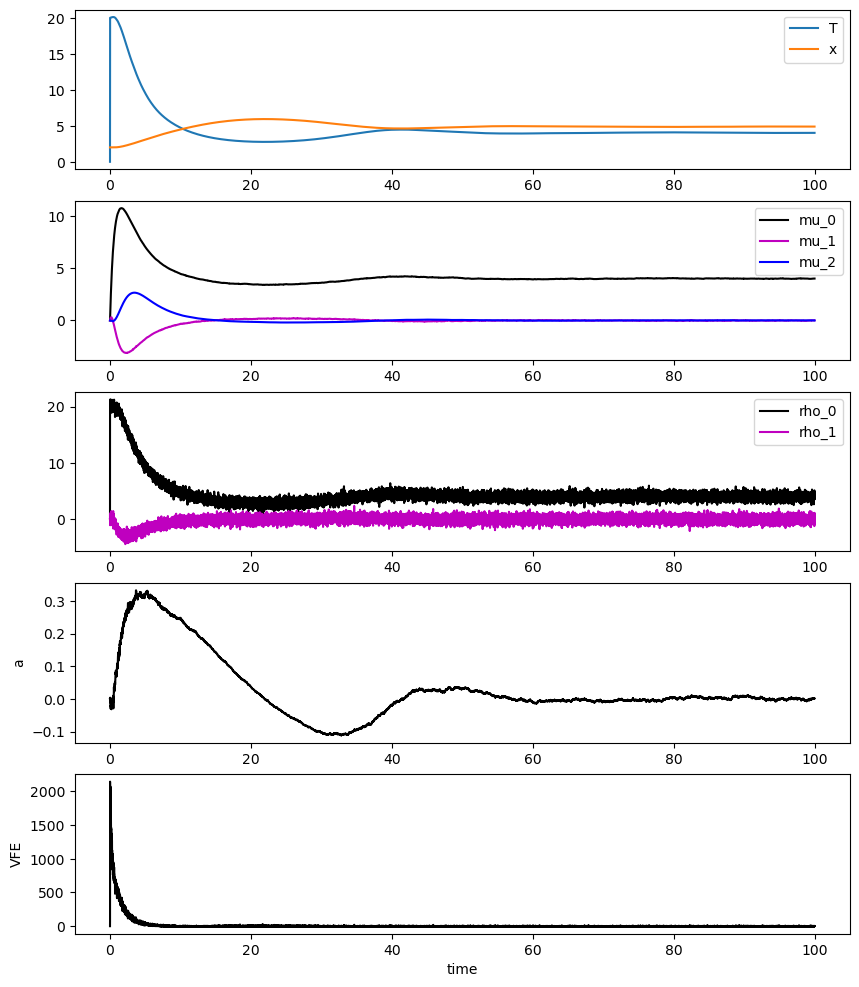

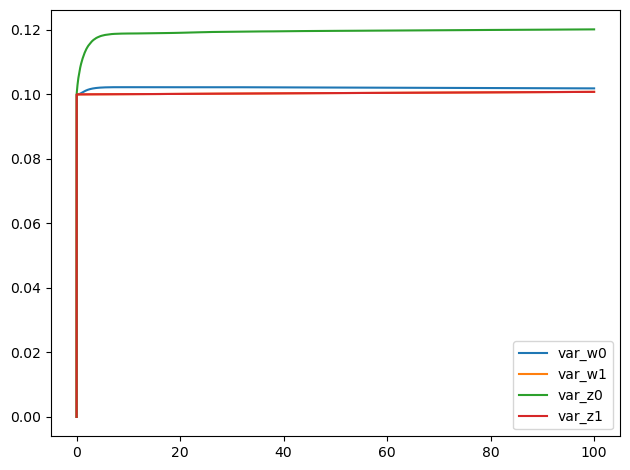

: 

In [4]:
# Plotting
plt.figure(figsize=(10, 12))

plt.subplot(5, 1, 1)
plt.plot(time, T, label='T')
plt.plot(time, x, label='x')
plt.legend()

plt.subplot(5, 1, 2)
plt.plot(time, mu_0, 'k', label='mu_0')
plt.plot(time, mu_1, 'm', label='mu_1')
plt.plot(time, mu_2, 'b', label='mu_2')
plt.legend()

plt.subplot(5, 1, 3)
plt.plot(time, rho_0, 'k', label='rho_0')
plt.plot(time, rho_1, 'm', label='rho_1')
plt.legend()

plt.subplot(5, 1, 4)
plt.plot(time, a, 'k')
plt.ylabel('a')

plt.subplot(5, 1, 5)
plt.plot(time, VFE, 'k')
plt.xlabel('time')
plt.ylabel('VFE')

plt.figure()
plt.plot(time, var_w0, label = 'var_w0')
plt.plot(time, var_w1, label = 'var_w1')
plt.plot(time, var_z0, label = 'var_z0')
plt.plot(time, var_z1, label = 'var_z1')
plt.legend()

plt.tight_layout()
plt.show()

In [11]:
# import numpy as np
# import matplotlib.pyplot as plt

# np.random.seed(6)

# # Simulation parameters
# simTime = 100
# dt = 0.005
# time = np.arange(0, simTime + dt, dt)
# N = len(time)
# action = True

# # Generative Model Parameters
# Td = 4
# actionTime = simTime / 4

# # Initialize sensor variables
# rho_0 = np.zeros(N)
# rho_1 = np.zeros(N)




# Omega_z0 = np.ones(N)*0.1
# Omega_z1 = np.ones(N)*0.1
# Omega_w0 = np.ones(N)*0.1
# Omega_w1 = np.ones(N)*0.1

# # Sensory variances
# Omega_z0[0] = 0.1
# Omega_z1[0] = 0.1

# # Hidden state variances
# Omega_w0[0] = 0.1
# Omega_w1[0] = 0.1



# # Initial brain state variables
# mu_0 = np.zeros(N)
# mu_1 = np.zeros(N)
# mu_2 = np.zeros(N)

# # Sensory noise in the generative process
# zgp_0 = np.random.randn(N) * 0.1
# zgp_1 = np.random.randn(N) * 0.1

# # Initialize the action variable
# a = np.zeros(N)

# # Initialize generative process
# x_dot = np.zeros(N)
# x = np.ones(N) * 2
# T0 = 100
# T = T0 / (x**2 + 1)
# Tx = -2 * T0 * x * (x**2 + 1)**(-2)
# T_dot = Tx * x_dot
# rho_0 = T + zgp_0
# rho_1 = T_dot + zgp_1

# # Initialize error terms
# epsilon_z_0 = rho_0 - mu_0
# epsilon_z_1 = rho_1 - mu_1
# epsilon_w_0 = mu_1 + mu_0 - Td
# epsilon_w_1 = mu_2 + mu_1

# # Initialize Variational Free Energy
# VFE = (1 / Omega_z0[0]) * (epsilon_z_0**2) / 2 + \
#       (1 / Omega_z1[0]) * (epsilon_z_1**2) / 2 + \
#       (1 / Omega_w0[0]) * (epsilon_w_0**2) / 2 + \
#       (1 / Omega_w1[0]) * (epsilon_w_1**2) / 2 + \
#       0.5 * np.log(Omega_w0 * Omega_w1 * Omega_z0 * Omega_z1)

# # Gradient descent learning parameters
# k = 0.1
# ka = 0.01
# komega = 0.01

# for i in range(1, N):
#     # Generative process
#     x_dot[i] = a[i - 1]
#     x[i] = x[i - 1] + dt * x_dot[i]
#     T[i] = T0 / (x[i]**2 + 1)
#     Tx[i] = -2 * T0 * x[i] * (x[i]**2 + 1)**(-2)
#     T_dot[i] = Tx[i] * x_dot[i]
#     rho_0[i] = T[i] + zgp_0[i]
#     rho_1[i] = T_dot[i] + zgp_1[i]

#     # Generative model
#     epsilon_z_0 = rho_0[i - 1] - mu_0[i - 1]
#     epsilon_z_1 = rho_1[i - 1] - mu_1[i - 1]
#     epsilon_w_0 = mu_1[i - 1] + mu_0[i - 1] - Td
#     epsilon_w_1 = mu_2[i - 1] + mu_1[i - 1]

#     VFE[i] = (1 / Omega_z0[i-1]) * (epsilon_z_0**2) / 2 + \
#              (1 / Omega_z1[i-1]) * (epsilon_z_1**2) / 2 + \
#              (1 / Omega_w0[i-1]) * (epsilon_w_0**2) / 2 + \
#              (1 / Omega_w1[i-1]) * (epsilon_w_1**2) / 2 + \
#              0.5 * np.log(Omega_w0[i-1] * Omega_w1[i-1] * Omega_z0[i-1] * Omega_z1[i-1])
    
    
#     # domega_z_0 = -komega*(0.5*(1/Omega_z0[i-1] - epsilon_z_0**2))
#     # domega_z_1 = -komega*(0.5*(1/Omega_z1[i-1] - epsilon_z_1**2))
#     # domega_w_0 = -komega*(0.5*(1/Omega_w0[i-1] - epsilon_w_0**2))
#     # domega_w_1 = -komega*(0.5*(1/Omega_w1[i-1] - epsilon_w_1**2))

  
#     # Omega_z0[i] = Omega_z0[i-1] + dt*domega_z_0
#     # Omega_z1[i] = Omega_z1[i-1] + dt*domega_z_1
#     # Omega_w0[i] = Omega_w0[i-1] + dt*domega_w_0
#     # Omega_w1[i] = Omega_w1[i-1] + dt*domega_w_1




#     mu_0[i] = mu_0[i - 1] + dt * (mu_1[i - 1] - k * (-epsilon_z_0 / Omega_z0[i-1] + epsilon_w_0 / Omega_w0[i-1]))
#     mu_1[i] = mu_1[i - 1] + dt * (mu_2[i - 1] - k * (-epsilon_z_1 / Omega_z1[i-1] + epsilon_w_0 / Omega_w0[i-1] + epsilon_w_1 / Omega_w1[i-1]))
#     mu_2[i] = mu_2[i - 1] + dt * (-k * epsilon_w_1 / Omega_w1[i-1])

#     if time[i] > 25:
#         a[i] = a[i - 1] + dt * (-ka * Tx[i] * epsilon_z_1 / Omega_z1[i-1])
#     else:
#         a[i] = 0



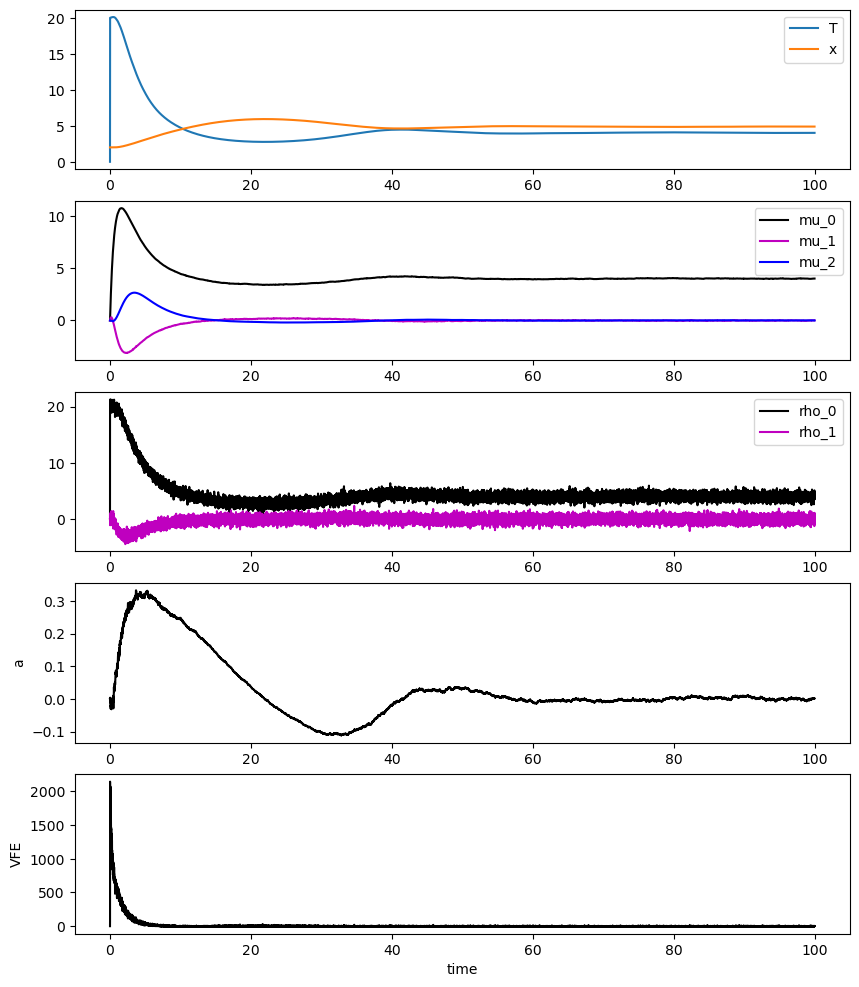

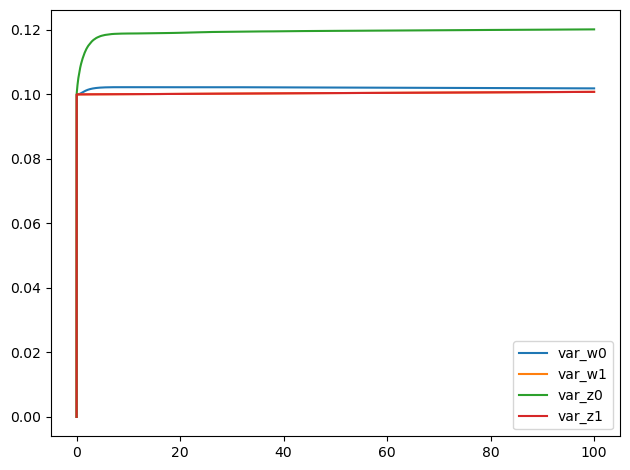

In [12]:
# Plotting 
plt.figure(figsize=(10, 12))

plt.subplot(5, 1, 1)
plt.plot(time, T, label='T')
plt.plot(time, x, label='x')
plt.legend()

plt.subplot(5, 1, 2)
plt.plot(time, mu_0, 'k', label='mu_0')
plt.plot(time, mu_1, 'm', label='mu_1')
plt.plot(time, mu_2, 'b', label='mu_2')
plt.legend()

plt.subplot(5, 1, 3)
plt.plot(time, rho_0, 'k', label='rho_0')
plt.plot(time, rho_1, 'm', label='rho_1')
plt.legend()

plt.subplot(5, 1, 4)
plt.plot(time, a, 'k')
plt.ylabel('a')

plt.subplot(5, 1, 5)
plt.plot(time, VFE, 'k')
plt.xlabel('time')
plt.ylabel('VFE')

plt.figure()
plt.plot(time, var_w0, label = 'var_w0')
plt.plot(time, var_w1, label = 'var_w1')
plt.plot(time, var_z0, label = 'var_z0')
plt.plot(time, var_z1, label = 'var_z1')
plt.legend()

plt.tight_layout()
plt.show()